In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [3]:
data = pd.read_csv('data/transformed_data.csv', index_col=0)

# General overview
## Number of instances vs time (of the year)

In [4]:
#number of instances over the years
data.year.value_counts().sort_index()

2013     2662
2014    10890
2015    10719
2016     1341
Name: year, dtype: int64

### Number of observations over time per year

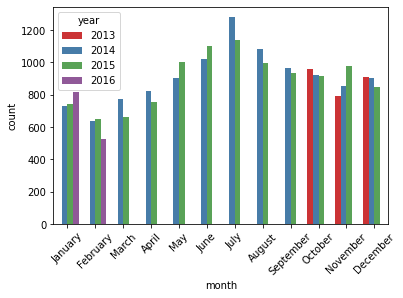

In [5]:
data['month'] = pd.Categorical(
    data['month'],
    categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
                'November', 'December'],
    ordered=True
)
data.sort_values('month')
chart = sns.countplot(data=data, x="month", hue="year", palette="Set1")
chart = chart.set_xticklabels(chart.get_xticklabels(), rotation=45)


### Number of observations over time averaged per month

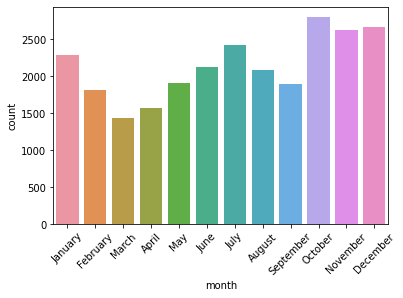

In [6]:
chart = sns.countplot(data=data, x="month")
chart = chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

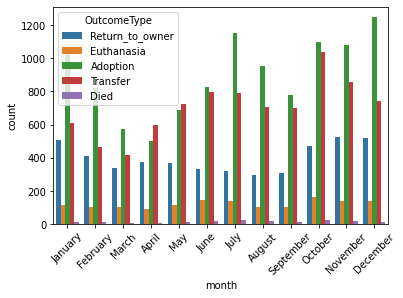

In [7]:
chart = sns.countplot(data=data, x="month", hue="OutcomeType")
chart = chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

### Number of observations per OutcomeType over time per weekday

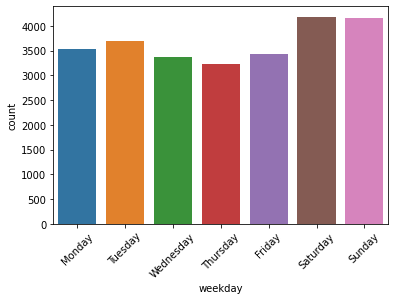

In [8]:
data['weekday'] = pd.Categorical(
    data['weekday'],
    categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    ordered=True
)
data.sort_values('weekday')
data = data.sort_values(by="weekday")

chart = sns.countplot(data=data, x="weekday")
chart = chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

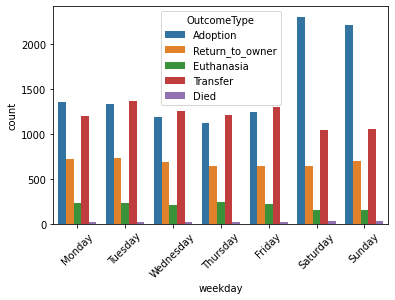

In [9]:
chart = sns.countplot(data=data, x="weekday", hue="OutcomeType")
chart = chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

Clearly on the weekends there are more adoptions happening.

## Number of Dogs and Cats

<AxesSubplot:xlabel='count', ylabel='AnimalType'>

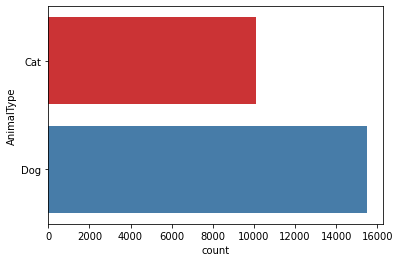

In [10]:
sns.countplot(data=data, y="AnimalType", palette='Set1')

## Rates of different outcomes (also over time)

In [11]:
#counts of the different outcomes
data.OutcomeType.value_counts().sort_index()

Adoption           10769
Died                 171
Euthanasia          1452
Return_to_owner     4773
Transfer            8447
Name: OutcomeType, dtype: int64

Now we will see how the share of different outcomes change with the month of the year

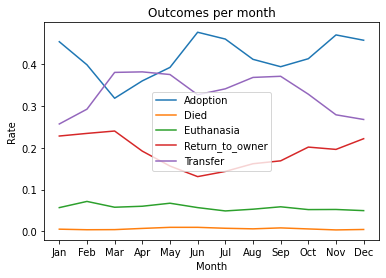

In [12]:
share_of_outcomes = np.zeros((12, 5))
outcomes = data.OutcomeType.unique()
outcomes.sort()
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
          'November', 'December']
for m in range(len(months)):
    share_of_outcomes[m - 1] = data[data.month == months[m]].OutcomeType.value_counts().sort_index()
    share_of_outcomes[m - 1] = share_of_outcomes[m - 1] / np.sum(share_of_outcomes[m - 1])

share_of_outcomes = share_of_outcomes.T

plt.title('Outcomes per month')
for i in range(5):
    plt.plot(share_of_outcomes[i], label=outcomes[i])
plt.legend()
plt.xlabel("Month")
plt.ylabel("Rate")
plt.xticks(range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

And the same over multiple years:

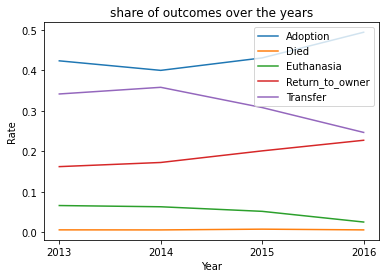

In [13]:
#now the same over the years
share_of_outcomes = np.zeros((4, 5))
outcomes = data.OutcomeType.unique()
outcomes.sort()

for y in [2013, 2014, 2015, 2016]:
    share_of_outcomes[y - 2013] = data[data.year == y].OutcomeType.value_counts().sort_index()
    share_of_outcomes[y - 2013] = share_of_outcomes[y - 2013] / np.sum(share_of_outcomes[y - 2013])

share_of_outcomes = share_of_outcomes.T

plt.title('share of outcomes over the years')
for i in range(5):
    plt.plot(share_of_outcomes[i], label=outcomes[i])
plt.legend()
plt.xlabel("Year")
plt.ylabel("Rate")
plt.xticks(range(0, 4), labels=['2013', '2014', '2015', '2016'])
plt.show()

Here we have a kind of nice insight that the rates of adoption and return to owner increase over the years, but the rate of transfer decreases over the years.

## Age distribution

c:\users\alexa\pycharmprojects\animal-shelter-analysis\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\alexa\pycharmprojects\animal-shelter-analysis\venv\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AgeuponOutcome'>

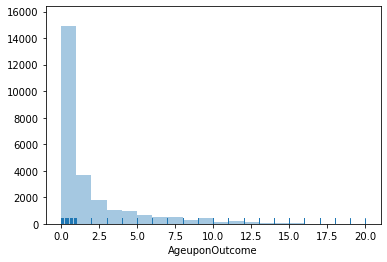

In [14]:
sns.distplot(data.AgeuponOutcome, bins=20, kde=False, rug=True)
# TODO @Lukas what to the negative values mean?
# data[data.AgeuponOutcome != 0].AgeuponOutcome.apply(np.log).hist(bins=20)
# plt.show()

## Outcomes vs. sex and neutralization

<AxesSubplot:xlabel='OutcomeType', ylabel='count'>

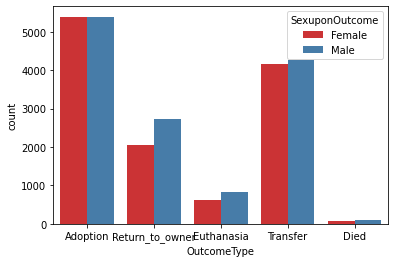

In [15]:
#plot outcomes in relation to the sex
sns.countplot(data=data, x="OutcomeType", hue="SexuponOutcome", palette='Set1')

# for s in ['Male','Female']:
#     data_ = data[data.SexuponOutcome == s]
#     l = len(data_)
#     v = data_.OutcomeType.value_counts().sort_index().apply(lambda x: x/l)
#     v.plot(label = s)
# plt.title('rates of outcomes by sex')
# plt.legend()
# plt.show()

seems like there are only minor differences

<AxesSubplot:xlabel='OutcomeType', ylabel='count'>

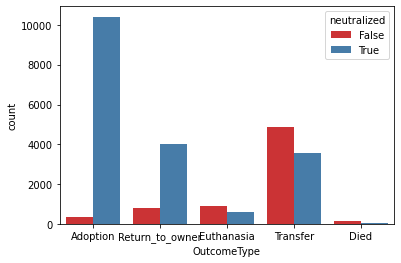

In [16]:
#plot outcomes in relation to neutralization
sns.countplot(data=data, x="OutcomeType", hue="neutralized", palette='Set1')

# for s in [True,False]:
#     data_ = data[data.neutralized == s]
#     l = len(data_)
#     v = data_.OutcomeType.value_counts().sort_index().apply(lambda x: x/l)
#     v.plot(label = s)
# plt.title('rates of outcomes by neutralization')
# plt.legend()
# plt.show()

Now thats interesting!

## Outcomes for dog vs. cat

<AxesSubplot:xlabel='OutcomeType', ylabel='count'>

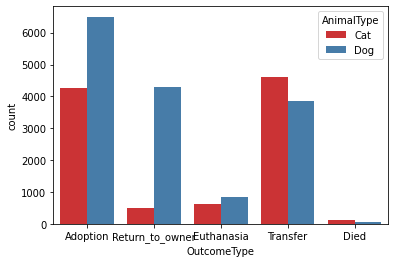

In [17]:
#plot outcomes in relation to the kind of animal
sns.countplot(data=data, x='OutcomeType', hue='AnimalType', palette="Set1")

# for s in ['Dog','Cat']:
#     data_ = data[data.AnimalType == s]
#     l = len(data_)
#     v = data_.OutcomeType.value_counts().sort_index().apply(lambda x: x/l)
#     v.plot(label = s)
# plt.title('rates of outcomes by kind of animal')
# plt.legend()
# plt.show()

This also seems interesting!

## Outcome by maturity
We consider an animal to be an adult if its older than 1 year and check if this has an influence on its outcome.

<AxesSubplot:xlabel='OutcomeType', ylabel='count'>

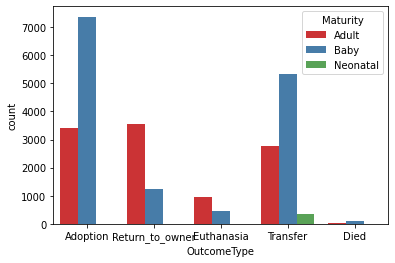

In [18]:
def extractMaturity(age):
    if age <= 0.019231:
        return "Neonatal"
    elif age <= 1:
        return "Baby"
    else:
        return "Adult"


data['Maturity'] = data.AgeuponOutcome.apply(extractMaturity)  #apply the function
sns.countplot(data=data, x="OutcomeType", hue="Maturity", palette='Set1')

Unsurprisingly younger animals get adopted more often. Also, some very young animals, which should not get separated from its mother yet (https://www.hospitalveterinariglories.com/puppy-with-its-mother/?lang=en ), are transferred.

## Outcome by age timeline

[Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Proportion'),
 Text(0.5, 1.0, 'Outcome by Age')]

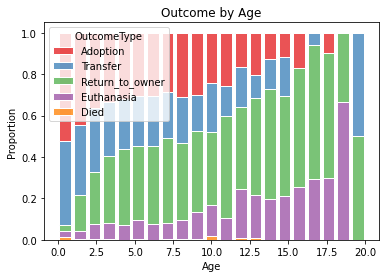

In [19]:
plot_data = data.copy()
plot_data["AgeuponOutcome"] = plot_data["AgeuponOutcome"].round(decimals=0)
x, y, hue = "AgeuponOutcome", "proportion", "OutcomeType"

plot_data = plot_data[hue].groupby(plot_data[x]).value_counts(normalize=True).rename(y).reset_index()

ax = sns.histplot(
    plot_data,
    x=x,
    weights=y,
    hue=hue,
    multiple='stack',
    palette="Set1",
    # Add white borders to the bars.
    edgecolor='white',
    # Shrink the bars a bit so they don't touch.
    shrink=0.8,
    bins=21
)

#specfiy axis labels
ax.set(xlabel='Age',
       ylabel='Proportion',
       title='Outcome by Age')


Text(0.5, 0.98, 'Outcome by Age')

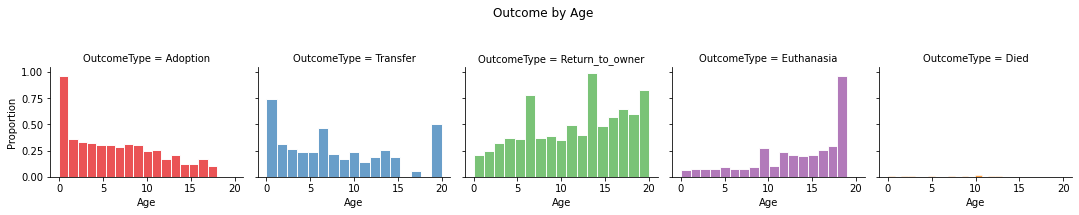

In [20]:
# Alternative plot for the stacked bar chart
hist_wrap = sns.FacetGrid(plot_data, col=hue, hue=hue, palette="Set1")
hist_wrap.map_dataframe(sns.histplot, x=x, weights=y, edgecolor='white', bins=17)
hist_wrap.set(xlabel='Age',
              ylabel='Proportion')
hist_wrap.fig.subplots_adjust(top=0.7)
plt.suptitle('Outcome by Age')

## Correlation matrix of features

In [21]:
data_cm = pd.read_csv('data/transformed_data_num.csv', index_col=0)
data_cm["outcometype"] = (data_cm["outcometype"] == "Adoption").astype(np.int)

c:\users\alexa\pycharmprojects\animal-shelter-analysis\venv\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


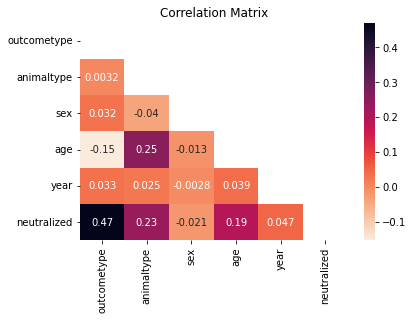

<Figure size 1152x864 with 0 Axes>

In [22]:
data_corr = data_cm[data_cm.columns[0:6]]  # excluding binary dummy columns
corr_mat = data_corr.corr()
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
cmap = sns.cm.rocket_r
sns.heatmap(corr_mat, mask=mask, cmap=cmap, annot=True)
plt.title("Correlation Matrix")
plt.figure(figsize=(16, 12))
plt.show()

From the correlation matrix we see that the most prominent predictors are whether or not an animal is neutered, as well as the year and the sex.

## Rare breeds & colors

In [23]:
data_bc = pd.read_csv('data/transformed_data.csv', index_col=0)
data_bc = data_bc.dropna()

In [24]:
breeds_1 = data_bc[data_bc.groupby("Breed").Breed.transform("count") > 5]

In [25]:
adoption_rate_breeds_1 = (breeds_1["OutcomeType"].value_counts()["Adoption"] / breeds_1[breeds_1.columns[0]].count())
adoption_rate_breeds_1

0.4786543170446077

In [26]:
breeds_2 = data_bc[data_bc.groupby("Breed").Breed.transform("count") <= 5]

In [27]:
adoption_rate_breeds_2 = (breeds_2["OutcomeType"].value_counts()["Adoption"] / breeds_2[breeds_2.columns[0]].count())
adoption_rate_breeds_2

0.46261682242990654

In [28]:
colors_1 = data_bc[data_bc.groupby("Color").Color.transform("count") > 3]

In [29]:
adoption_rate_colors_1 = (colors_1["OutcomeType"].value_counts()["Adoption"] / colors_1[colors_1.columns[0]].count())
adoption_rate_colors_1

0.4784623486045287

In [30]:
colors_2 = data_bc[data_bc.groupby("Color").Color.transform("count") <= 3]

In [31]:
adoption_rate_colors_2 = (colors_2["OutcomeType"].value_counts()["Adoption"] / colors_2[colors_2.columns[0]].count())
adoption_rate_colors_2

0.5

In [32]:
index = ("breeds_normal", "breeds_rare", "colors_normal", "colors_rare")
adoption_rates = (adoption_rate_breeds_1, adoption_rate_breeds_2, adoption_rate_colors_1, adoption_rate_colors_2)

df_rarity = pd.DataFrame(
    adoption_rates,
    columns=["adoption_rate"],
    index=index
)

df_rarity

,adoption_rate
breeds_normal,0.478654
breeds_rare,0.462617
colors_normal,0.478462
colors_rare,0.500000


There does not seem to be any significant correlation between rarity of color/breed and a higher adoption rate.

# Breeds adoption rate analysis

Here we will look at the breeds which have a lot of entries but still show some interesting adoption rates.
## Dogs
### Overall
Here we generalize breeds with less entries to be exotic in order to obtain meaningful insights.

c:\users\alexa\pycharmprojects\animal-shelter-analysis\venv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\alexa\pycharmprojects\animal-shelter-analysis\venv\lib\site-packages\pandas\core\generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


<AxesSubplot:xlabel='percentage', ylabel='Breed'>

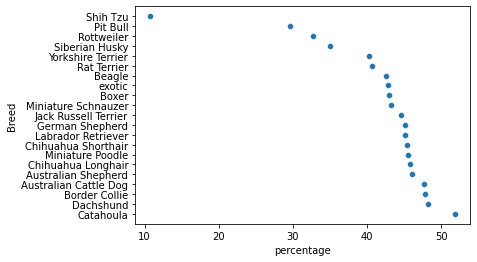

In [33]:
# Label dogs with less then 150 counts as exotic
dogs_adoption = data[data["AnimalType"] == "Dog"]
counts = dogs_adoption.Breed.value_counts(dropna=False)
valids = counts[counts < 150].index
dogs_adoption.Breed[data["Breed"].isin(valids)] = 'exotic'
dogs_adoption.Breed.value_counts(dropna=False)
# Get percentages of outcomes per breed
breeds = dogs_adoption.groupby(['Breed', 'OutcomeType']).agg({'OutcomeType': 'count'}).groupby(level=0).apply(
    lambda x: 100 * x / float(x.sum()))
breeds = breeds.rename(columns={'OutcomeType': 'percentage'})
breeds.reset_index(inplace=True)
# Only look at adoption
breeds = breeds.query('OutcomeType == "Adoption"').sort_values("percentage")
sns.scatterplot(data=breeds, y="Breed", x="percentage")

Pit bulls are as expected not adopted that often, same for Rottweilers. Surprising enough Shih Tzus are not adopted very
often. We didn't expect this but one explanation could be that they do have a lot of hair which might be a put-off for
people looking for a home dog. On top of the list in terms of adoption rates are rather popular breeds which was to be expected.

### Single breeds with high adoption rates

c:\users\alexa\pycharmprojects\animal-shelter-analysis\venv\lib\site-packages\ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app


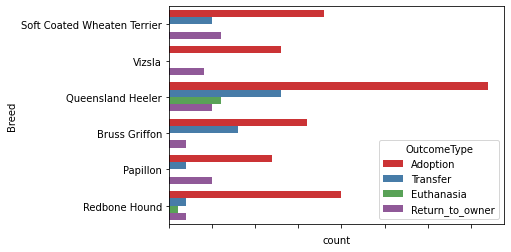

In [46]:
# Get percentages of outcomes per breed
breeds = data[data.AnimalType == "Dog"].groupby(['Breed', 'OutcomeType']).agg({'OutcomeType': 'count'}).groupby(
    level=0).apply(
    lambda x: 100 * x / float(x.sum()))
breeds = breeds.rename(columns={'OutcomeType': 'percentage'})
breeds.reset_index(inplace=True)
# Filter
breeds = breeds.query('OutcomeType == "Adoption" & 70 < percentage < 100')
breed_names = breeds.Breed.values
# Filter outliers
breed_data = data[data.groupby('Breed').Breed.transform('count') > 15]
# Filter for breeds with adoption rate of 70% or higher
breed_data = breed_data[breed_data.Breed.isin(breed_names)]
chart = sns.countplot(data=breed_data, y="Breed", hue="OutcomeType", palette='Set1')
chart = chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

In [35]:
results = []
names = ['Redbone Hound', 'Vizsla']
for name in names:
    results.append({'Breed': name, 'No. of entries': data.Breed.value_counts()[name],
                    'No. of adoptions': data[data['OutcomeType'] == 'Adoption'].Breed.value_counts()[name]})
results = pd.DataFrame(results)
results['Adoption Rate'] = results['No. of adoptions'] / results['No. of entries']
results.sort_values('Adoption Rate', ascending=False).reset_index(drop=True)

,Breed,No. of entries,No. of adoptions,Adoption Rate
0,Redbone Hound,25,20,0.800000
1,Vizsla,17,13,0.764706


We have 25 Rebone Hound entries and of these 20 got adopted which is an adoption rate of 80% which is quite significant.
 As runner up we have 17 entries for Vizsla's with 13 of them being adopted (76% adoption rate).

## Cats
### Overall
Here we generalize breeds with less entries to be exotic in order to obtain meaningful insights.

c:\users\alexa\pycharmprojects\animal-shelter-analysis\venv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\alexa\pycharmprojects\animal-shelter-analysis\venv\lib\site-packages\pandas\core\generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


<AxesSubplot:xlabel='percentage', ylabel='Breed'>

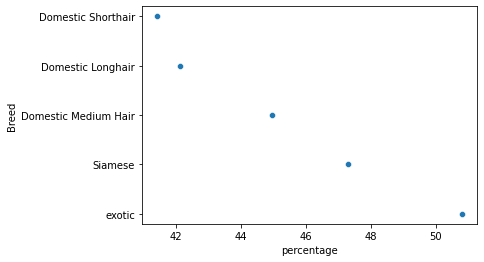

In [36]:
# Label cats with less then 150 counts as exotic
cats_adoption = data[data["AnimalType"] == "Cat"]
counts = cats_adoption.Breed.value_counts(dropna=False)
valids = counts[counts < 150].index
cats_adoption.Breed[data["Breed"].isin(valids)] = 'exotic'
cats_adoption.Breed.value_counts(dropna=False)
# Get percentages of outcomes per breed
breeds = cats_adoption.groupby(['Breed', 'OutcomeType']).agg({'OutcomeType': 'count'}).groupby(level=0).apply(
    lambda x: 100 * x / float(x.sum()))
breeds = breeds.rename(columns={'OutcomeType': 'percentage'})
breeds.reset_index(inplace=True)
# Only look at adoption
breeds = breeds.query('OutcomeType == "Adoption"').sort_values("percentage")
sns.scatterplot(data=breeds, y="Breed", x="percentage")

Interestingly enough exotic cats seem to be adopted more often then the most common breeds

### Single breeds with high adoption rates

c:\users\alexa\pycharmprojects\animal-shelter-analysis\venv\lib\site-packages\ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app


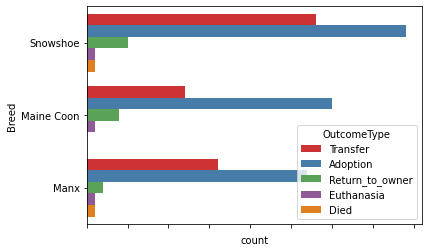

In [37]:
# Get percentages of outcomes per breed
breeds = data[data.AnimalType == "Cat"].groupby(['Breed', 'OutcomeType']).agg({'OutcomeType': 'count'}).groupby(
    level=0).apply(
    lambda x: 100 * x / float(x.sum()))
breeds = breeds.rename(columns={'OutcomeType': 'percentage'})
breeds.reset_index(inplace=True)
# Filter
breeds = breeds.query('OutcomeType == "Adoption" & 50 < percentage < 100')
breed_names = breeds.Breed.values
# Filter outliers
breed_data = data[data.groupby('Breed').Breed.transform('count') > 15]
# Filter for breeds with adoption rate of 70% or higher
breed_data = breed_data[breed_data.Breed.isin(breed_names)]
chart = sns.countplot(data=breed_data, y="Breed", hue="OutcomeType", palette='Set1')
chart = chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

In [38]:
results = []
names = ['Snowshoe', 'Maine Coon', 'Manx']
for name in names:
    results.append({'Breed': name, 'No. of entries': data.Breed.value_counts()[name],
                    'No. of adoptions': data[data['OutcomeType'] == 'Adoption'].Breed.value_counts()[name]})
results = pd.DataFrame(results)
results['Adoption Rate'] = results['No. of adoptions'] / results['No. of entries']
results.sort_values('Adoption Rate', ascending=False).reset_index(drop=True)

,Breed,No. of entries,No. of adoptions,Adoption Rate
0,Maine Coon,47,30,0.638298
1,Manx,47,27,0.574468
2,Snowshoe,74,39,0.527027


Cats highest adoption rates are lower than the ones of dogs. Snowshoe cats are rather rare cats so our assumption that
rare breeds get adopted more often is true here. Maine Coons are not rare but very popular because of their gentle behaviour.
Same goes for Manxes. They are also not really rare but popular.

# Colors adoption rate analysis

Same as above but for colors
## Dogs
### Overall

c:\users\alexa\pycharmprojects\animal-shelter-analysis\venv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\alexa\pycharmprojects\animal-shelter-analysis\venv\lib\site-packages\pandas\core\generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


<AxesSubplot:xlabel='percentage', ylabel='Color'>

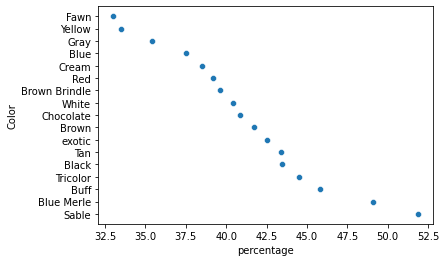

In [39]:
# Label dogs with less then 150 counts as exotic
dogs_adoption = data[data["AnimalType"] == "Dog"]
counts = dogs_adoption.Color.value_counts(dropna=False)
valids = counts[counts < 150].index
dogs_adoption.Color[data["Color"].isin(valids)] = 'exotic'
dogs_adoption.Color.value_counts(dropna=False)
# Get percentages of outcomes per Color
Colors = dogs_adoption.groupby(['Color', 'OutcomeType']).agg({'OutcomeType': 'count'}).groupby(level=0).apply(
    lambda x: 100 * x / float(x.sum()))
Colors = Colors.rename(columns={'OutcomeType': 'percentage'})
Colors.reset_index(inplace=True)
# Only look at adoption
Colors = Colors.query('OutcomeType == "Adoption"').sort_values("percentage")
sns.scatterplot(data=Colors, y="Color", x="percentage")

### Single colors with high adoption rates

c:\users\alexa\pycharmprojects\animal-shelter-analysis\venv\lib\site-packages\ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()


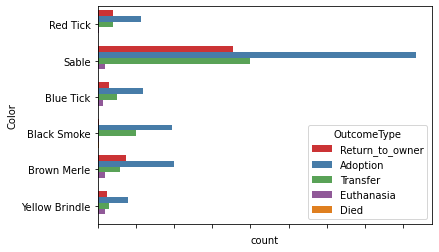

In [40]:
# Get percentages
colors = data[data["AnimalType"] == "Dog"].groupby(['Color', 'OutcomeType']).agg({'OutcomeType': 'count'}).groupby(
    level=0).apply(
    lambda x: 100 * x / float(x.sum()))
colors = colors.rename(columns={'OutcomeType': 'percentage'})
colors.reset_index(inplace=True)
# Filter
colors = colors.query('OutcomeType == "Adoption" & 50 < percentage < 100')
color_names = colors.Color.values
color_names
# Filter outliers
color_data = data[data.groupby('Color').Color.transform('count') > 15]
# Filter for colors with adoption rate of 70% or higher
color_data = color_data[color_data.Color.isin(color_names)]
chart = sns.countplot(data=color_data, y="Color", hue="OutcomeType", palette='Set1')
chart = chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

In [41]:
results = []
names = ['Red Tick', 'Sable', 'Blue Tick', 'Black Smoke', 'Brown Merle', 'Yellow Brindle']
for name in names:
    results.append({'Color': name, 'No. of entries': data.Color.value_counts()[name],
                    'No. of adoptions': data[data['OutcomeType'] == 'Adoption'].Color.value_counts()[name]})
results = pd.DataFrame(results)
results['Adoption Rate'] = results['No. of adoptions'] / results['No. of entries']
results.sort_values('Adoption Rate', ascending=False).reset_index(drop=True)

,Color,No. of entries,No. of adoptions,Adoption Rate
0,Black Smoke,62,39,0.629032
1,Red Tick,40,23,0.575000
2,Brown Merle,71,40,0.563380
3,Blue Tick,43,24,0.558140
4,Sable,322,167,0.518634
5,Yellow Brindle,31,16,0.516129


For the colors we don't have such extreme cases but dogs with the color Black Smoke tend to get adopted more often
with an adoption rate of around 63%.

## Cats
### Overall

c:\users\alexa\pycharmprojects\animal-shelter-analysis\venv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\alexa\pycharmprojects\animal-shelter-analysis\venv\lib\site-packages\pandas\core\generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


<AxesSubplot:xlabel='percentage', ylabel='Color'>

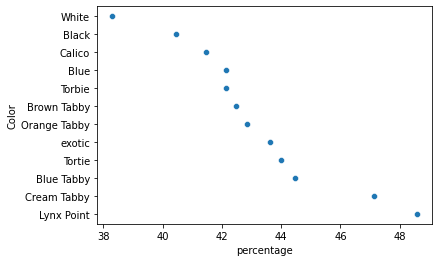

In [42]:
# Label cats with less then 150 counts as exotic
cats_adoption = data[data["AnimalType"] == "Cat"]
counts = cats_adoption.Color.value_counts(dropna=False)
valids = counts[counts < 150].index
cats_adoption.Color[data["Color"].isin(valids)] = 'exotic'
cats_adoption.Color.value_counts(dropna=False)
# Get percentages of outcomes per Color
Colors = cats_adoption.groupby(['Color', 'OutcomeType']).agg({'OutcomeType': 'count'}).groupby(level=0).apply(
    lambda x: 100 * x / float(x.sum()))
Colors = Colors.rename(columns={'OutcomeType': 'percentage'})
Colors.reset_index(inplace=True)
# Only look at adoption
Colors = Colors.query('OutcomeType == "Adoption"').sort_values("percentage")
sns.scatterplot(data=Colors, y="Color", x="percentage")

### Single colors with high adoption rates

c:\users\alexa\pycharmprojects\animal-shelter-analysis\venv\lib\site-packages\ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()


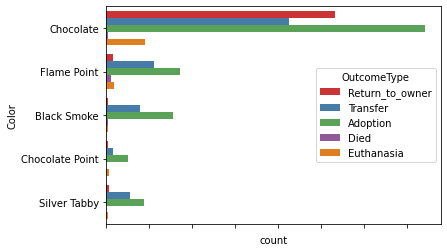

In [43]:
# Get percentages
colors = data[data["AnimalType"] == "Cat"].groupby(['Color', 'OutcomeType']).agg({'OutcomeType': 'count'}).groupby(
    level=0).apply(
    lambda x: 100 * x / float(x.sum()))
colors = colors.rename(columns={'OutcomeType': 'percentage'})
colors.reset_index(inplace=True)
# Filter
colors = colors.query('OutcomeType == "Adoption" & 50 < percentage < 100')
color_names = colors.Color.values
color_names
# Filter outliers
color_data = data[data.groupby('Color').Color.transform('count') > 15]
# Filter for colors with adoption rate of 70% or higher
color_data = color_data[color_data.Color.isin(color_names)]
chart = sns.countplot(data=color_data, y="Color", hue="OutcomeType", palette='Set1')
chart = chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

In [44]:
results = []
names = ['Chocolate', 'Flame Point', 'Black Smoke', 'Chocolate Point', 'Silver Tabby']
for name in names:
    results.append({'Color': name, 'No. of entries': data.Color.value_counts()[name],
                    'No. of adoptions': data[data['OutcomeType'] == 'Adoption'].Color.value_counts()[name]})
results = pd.DataFrame(results)
results['Adoption Rate'] = results['No. of adoptions'] / results['No. of entries']
results.sort_values('Adoption Rate', ascending=False).reset_index(drop=True)

,Color,No. of entries,No. of adoptions,Adoption Rate
0,Chocolate Point,20,13,0.650000
1,Black Smoke,62,39,0.629032
2,Silver Tabby,39,22,0.564103
3,Flame Point,83,43,0.518072
4,Chocolate,448,185,0.412946
